In [11]:
# Bernstein-Vazirani algorithm for 8 qubits
# Using Z-gates and I-gates in the oracle.

nQubits = 8
s = 150 # the secret string in binary is 10010110.

s = s % (2**nQubits) # make sure the string is nQubits long 
# and that s can be represented with nQubits

print(s) # should be 150

150


/tmp/ipykernel_62222/2712546627.py:13: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i(i)


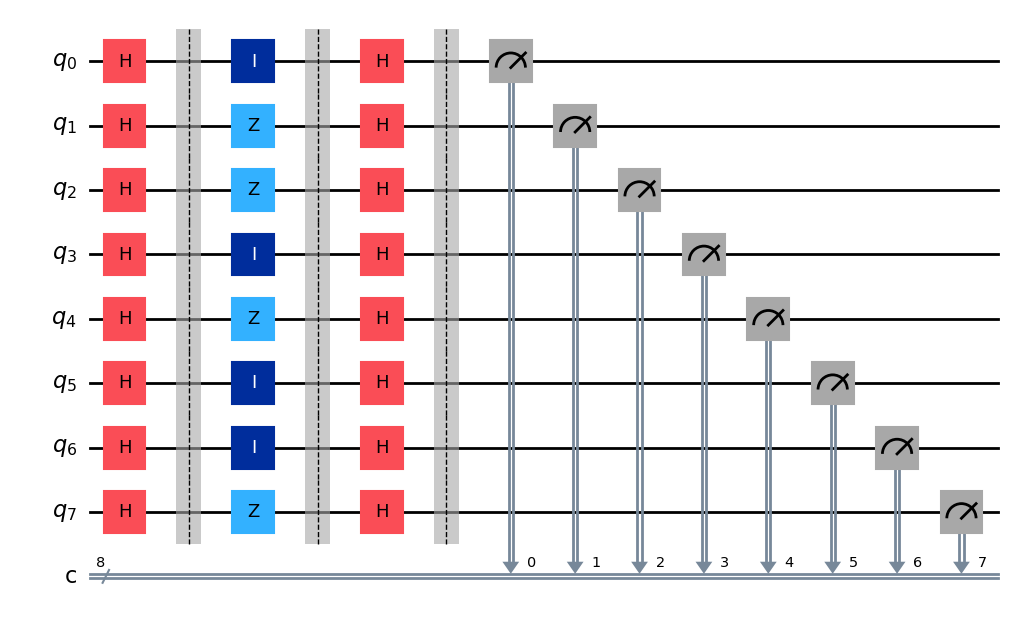

In [15]:
from qiskit import *
circuit = QuantumCircuit(nQubits, nQubits)

circuit.h(range(nQubits))

circuit.barrier()

# oracle
for i in range(nQubits):
    if (s & (1 << i)):
        circuit.z(i)
    else:
        circuit.i(i)

circuit.barrier()

circuit.h(range(nQubits))

circuit.barrier()

circuit.measure(range(nQubits), range(nQubits))

circuit.draw(style='iqp', output='mpl')

In [18]:
# In this section Im going to send a job to the IBMQ backend
# and get the results from the job.

from qiskit_ibm_provider import IBMProvider, least_busy

print(least_busy(IBMProvider().backends(min_num_qubits=8, simulator=False, operational=True)))

<IBMBackend('ibm_osaka')>


In [19]:
realBackend = least_busy(IBMProvider().backends(min_num_qubits=8, simulator=False, operational=True))
print(realBackend)

<IBMBackend('ibm_osaka')>


In [ ]:
from qiskit.tools.monitor import job_monitor
from qiskit.compiler import transpile

transpiledCircuit = transpile(circuit, realBackend) # transpile the circuit for the real backend

job = execute(transpiledCircuit, realBackend, shots=1000)

In [25]:
job_monitor(job)

Job Status: job has successfully run


In [37]:
job.time_per_step()

{'created': datetime.datetime(2023, 12, 7, 12, 4, 58, 820774, tzinfo=tzlocal()),
 'finished': datetime.datetime(2023, 12, 7, 13, 52, 36, 734000, tzinfo=tzlocal()),
 'running': datetime.datetime(2023, 12, 7, 13, 52, 25, 212000, tzinfo=tzlocal())}

#### Resources used

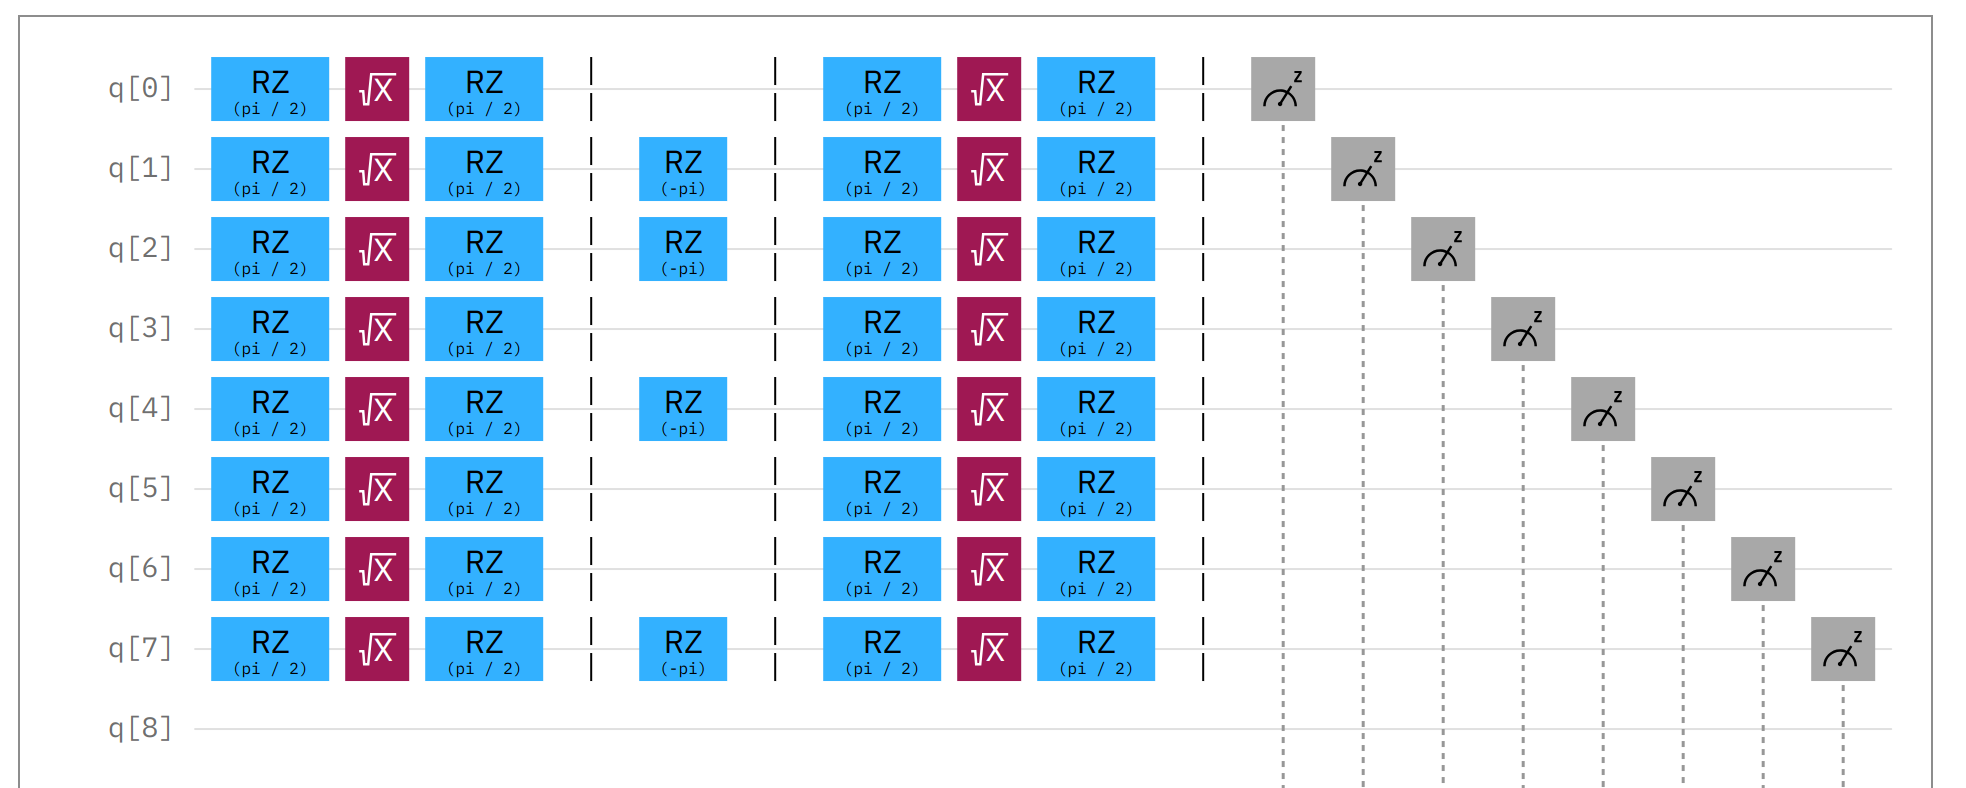

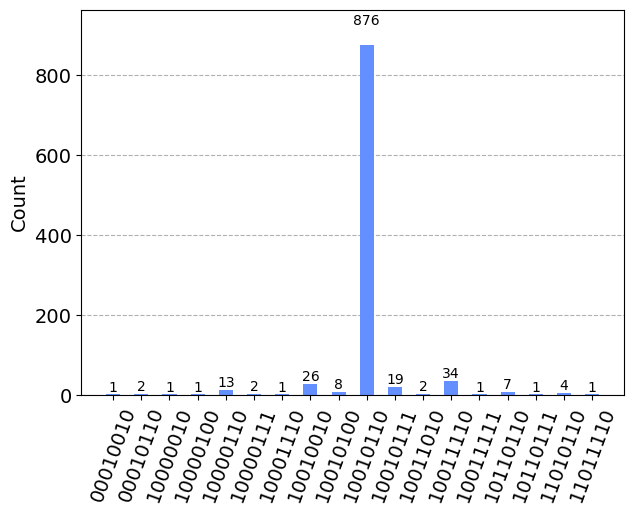

In [26]:
result = job.result()
counts = result.get_counts(transpiledCircuit)

from qiskit.visualization import plot_histogram

plot_histogram(counts)

### This time, Im going to synthesize the Oracle usign reversed CNOT gates.

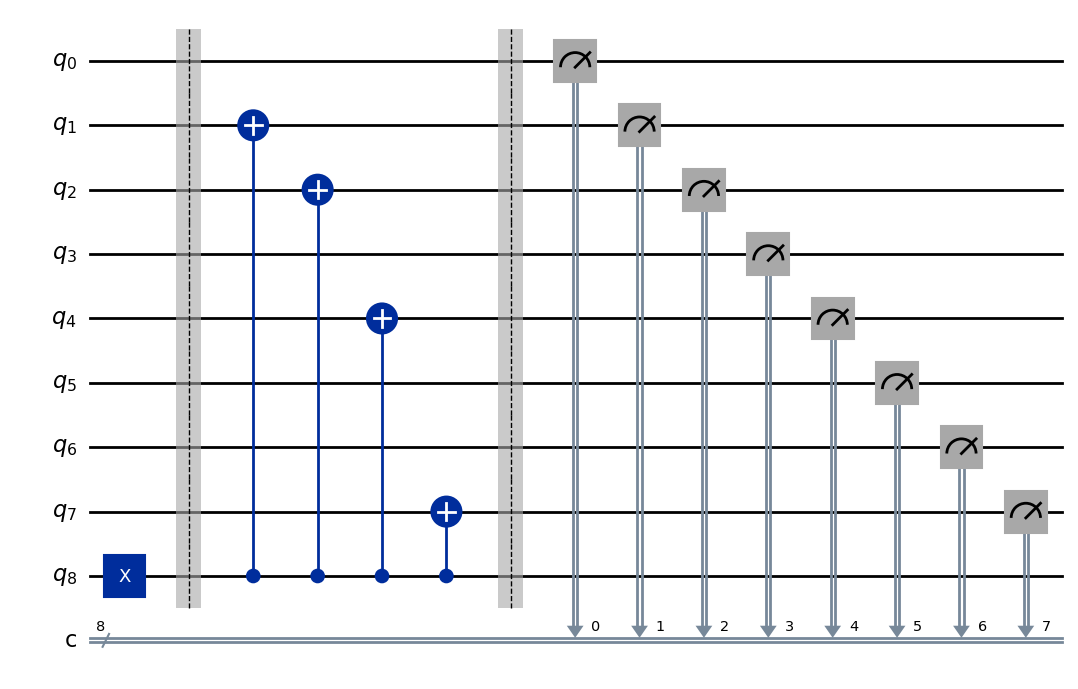

In [31]:
circuit2 = QuantumCircuit(nQubits+1, nQubits)
circuit2.x(nQubits)
circuit2.barrier()

s_in_binary = bin(s)[2:].zfill(nQubits) # convert s to binary and pad with zeros to make it nQubits long.

for ii, yesno in enumerate(reversed(s_in_binary)):
    if yesno == '1':
        circuit2.cx(nQubits, ii)

circuit2.barrier()

circuit2.measure(range(nQubits), range(nQubits))

circuit2.draw(style='iqp', output='mpl')

In [32]:
transpiledCircuit2 = transpile(circuit2, realBackend) # transpile the circuit for the real backend
job2 = execute(transpiledCircuit2, realBackend, shots=1000)

In [33]:
job_monitor(job2)

Job Status: job has successfully run


In [38]:
job2.time_per_step()

{'created': datetime.datetime(2023, 12, 7, 18, 32, 58, 378088, tzinfo=tzlocal()),
 'finished': datetime.datetime(2023, 12, 7, 18, 33, 13, 45000, tzinfo=tzlocal()),
 'running': datetime.datetime(2023, 12, 7, 18, 32, 59, 324000, tzinfo=tzlocal())}

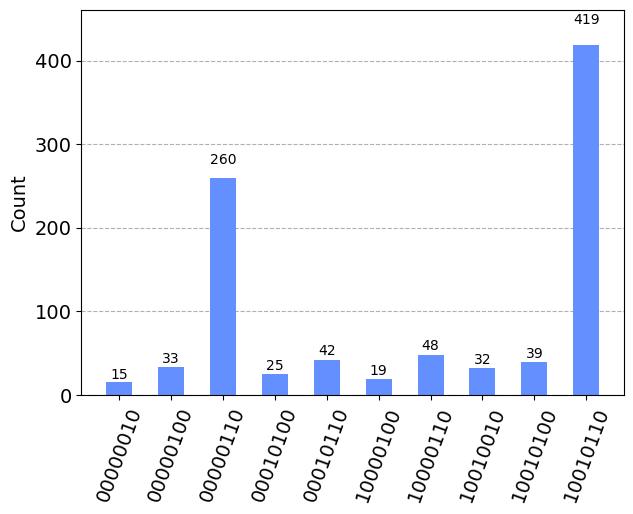

In [39]:
result2 = job2.result()
counts2 = result2.get_counts(transpiledCircuit2)

# filter out the results with less than 10 counts
filteredCounts2 = {k: v for k, v in counts2.items() if v > 10} 

plot_histogram(filteredCounts2)

#### Resuorces used.

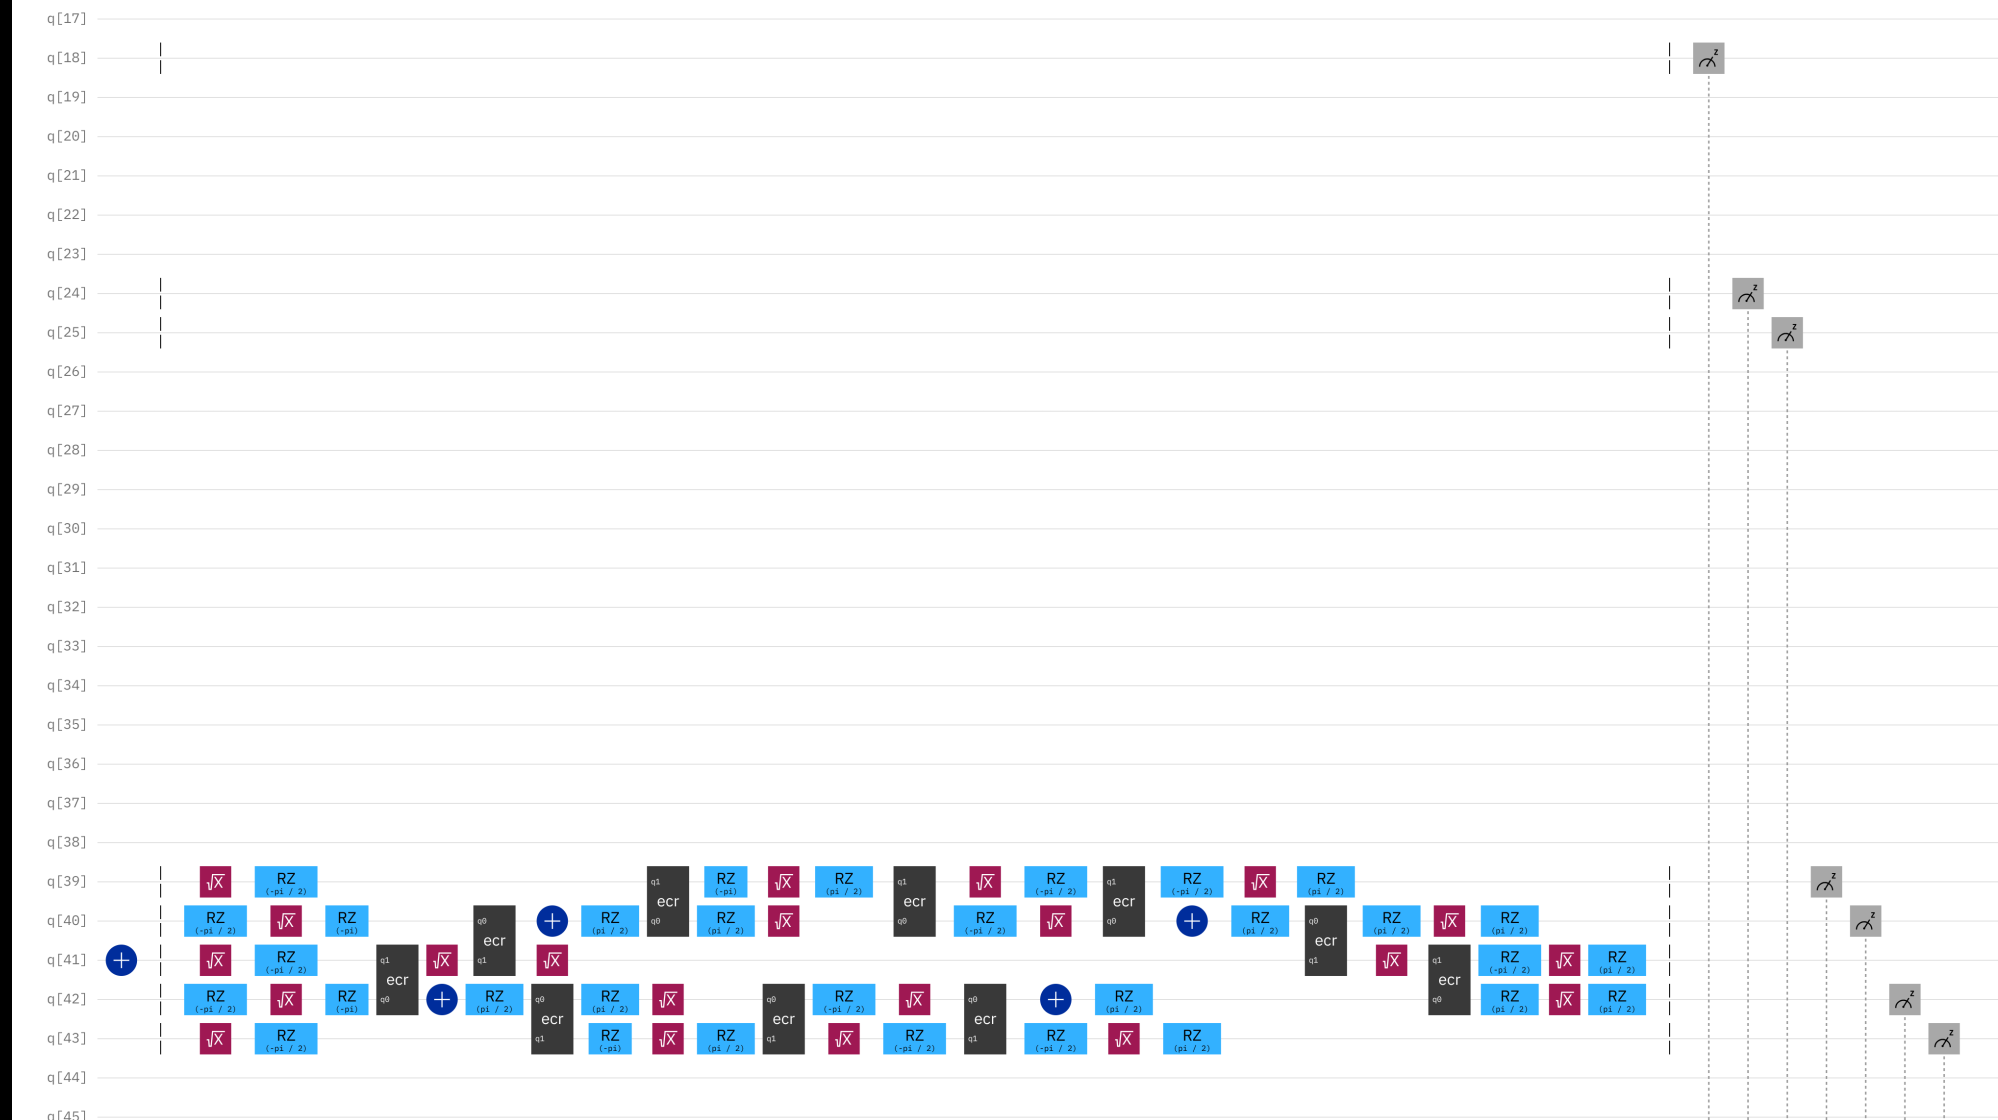